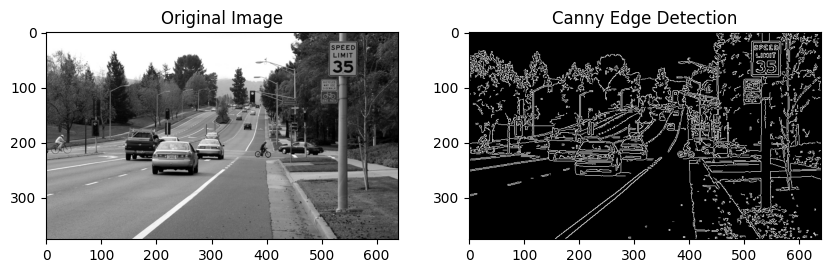

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('road1.png', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image, 100, 200)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Canny Edge Detection')
plt.show()


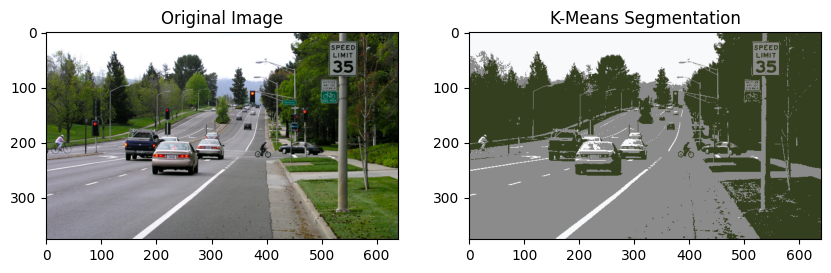

In [ ]:
image = cv2.imread('road1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

_, labels, centers = cv2.kmeans(pixel_values, 3, None, (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0), 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(segmented_image), plt.title('K-Means Segmentation')
plt.show()


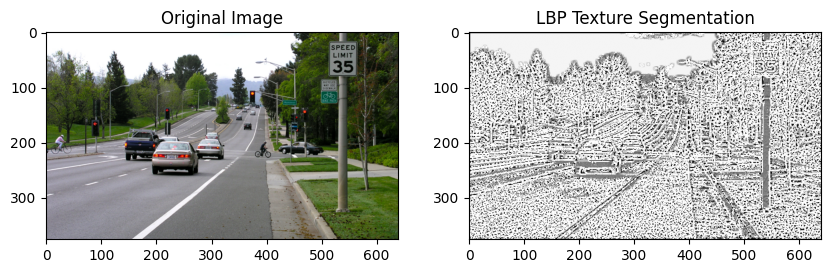

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

def lbp_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(gray, n_points, radius, method="uniform")
    return lbp

image = cv2.imread("road1.png")
lbp_result = lbp_segmentation(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(lbp_result, cmap="gray")
plt.title("LBP Texture Segmentation")

plt.show()


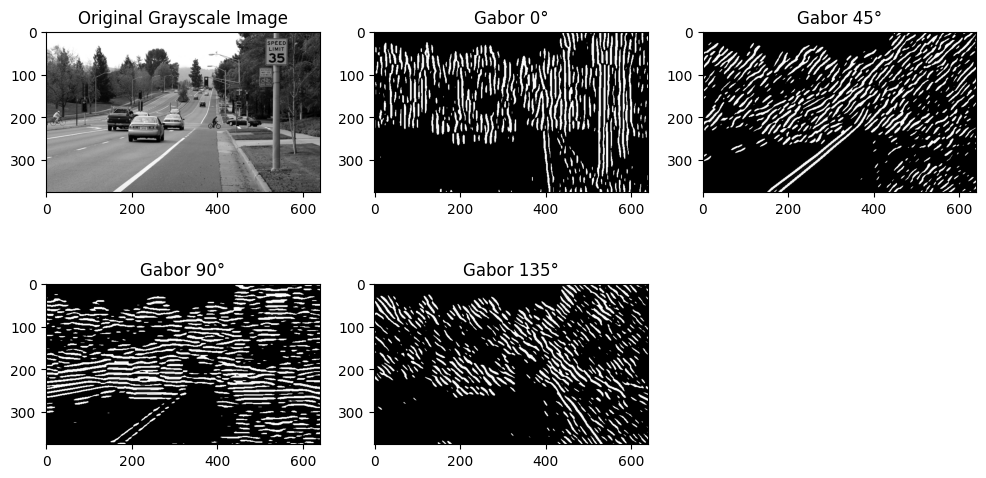

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor

image = cv2.imread("road1.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def apply_gabor(gray_img, theta):
    frequency = 0.1
    gabor_filtered, _ = gabor(gray_img, frequency=frequency, theta=theta)
    return gabor_filtered

gabor_0 = apply_gabor(gray, theta=0)
gabor_45 = apply_gabor(gray, theta=np.pi/4)
gabor_90 = apply_gabor(gray, theta=np.pi/2)
gabor_135 = apply_gabor(gray, theta=3*np.pi/4)

def normalize(img):
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

gabor_0 = normalize(gabor_0)
gabor_45 = normalize(gabor_45)
gabor_90 = normalize(gabor_90)
gabor_135 = normalize(gabor_135)

plt.figure(figsize=(12,6))
plt.subplot(2,3,1), plt.imshow(gray, cmap='gray'), plt.title("Original Grayscale Image")
plt.subplot(2,3,2), plt.imshow(gabor_0, cmap='gray'), plt.title("Gabor 0°")
plt.subplot(2,3,3), plt.imshow(gabor_45, cmap='gray'), plt.title("Gabor 45°")
plt.subplot(2,3,4), plt.imshow(gabor_90, cmap='gray'), plt.title("Gabor 90°")
plt.subplot(2,3,5), plt.imshow(gabor_135, cmap='gray'), plt.title("Gabor 135°")
plt.show()


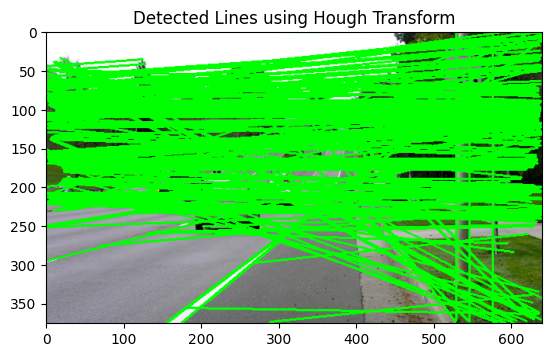

In [ ]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)

line_image = np.copy(image)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(line_image)
plt.title('Detected Lines using Hough Transform')
plt.show()



0: 384x640 2 persons, 1 bicycle, 6 cars, 1 truck, 3 traffic lights, 112.3ms
Speed: 5.0ms preprocess, 112.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


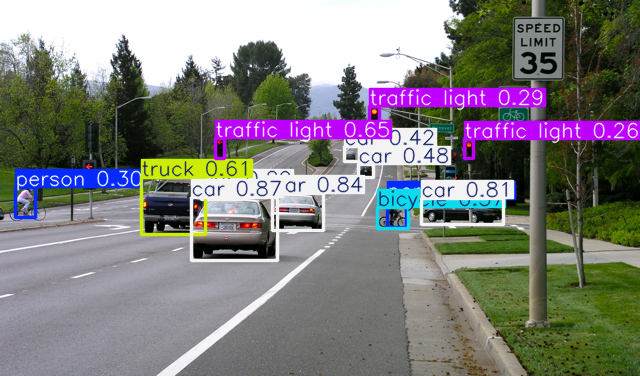

In [ ]:
import cv2
from ultralytics import YOLO

yolo = YOLO('yolov8n.pt')

image_path = 'road1.png'
image = cv2.imread(image_path)

results = yolo(image, conf=0.25)

for result in results:
    result.show()


100%|██████████| 169M/169M [00:03<00:00, 47.1MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 74.5MB/s]


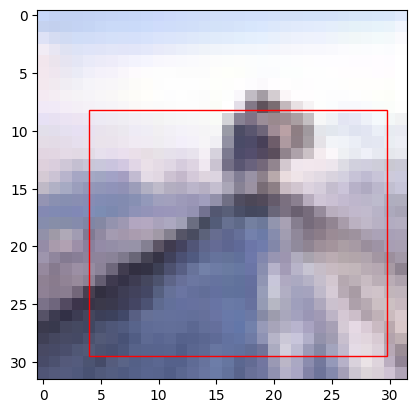

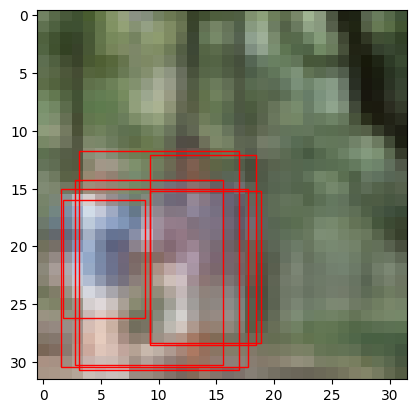

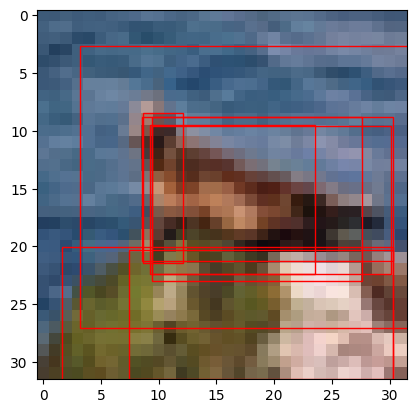

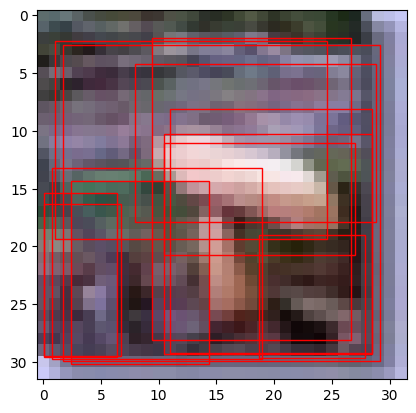

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Check GPU Availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load CIFAR-100 Dataset
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Load Pretrained Faster R-CNN
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.to(device)
model.eval()  # Set model to evaluation mode

# Get a Sample Image
dataiter = iter(testloader)
images, labels = next(dataiter)
images = images.to(device)

# Make Predictions
with torch.no_grad():
    predictions = model(images)

# Display Image & Predictions
def show_image_with_boxes(img, prediction):
    img = img.permute(1, 2, 0).cpu().numpy()
    plt.imshow(img)

    for box in prediction["boxes"]:
        x1, y1, x2, y2 = box.cpu().numpy()
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, edgecolor='red', facecolor='none'))

    plt.show()

for i in range(4):
    show_image_with_boxes(images[i], predictions[i])
